<a href="https://colab.research.google.com/github/adrianriverar/Simulacion-II/blob/main/Examen%201er%20parcial/Problema4_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problema 19**
Las bombillas eléctricas de un fabricante $\mathrm{A}$ tienen una duración media de $1400$ horas con una desviación típica de $200$ horas, mientras que las de otro fabricante $\mathrm{B}$ tienen una duración media de $1200$ horas con una desviación típica de $100$ horas.

Si se toman muestras al azar de $125$ bombillas de cada fabricante, ¿cuál es la probabilidad de que las bombillas de $\mathrm{A}$ tengan una duración media que sea al menos 

*a*) $160$ horas

*b*) $250$ horas 

mayor que la duración media de las bombillas de $\mathrm{B}$?

# **Resolución**
## **1. Identifique las variables.**

Tenemos dos: 

1.   $A:=$ Duración en horas de una bombilla del fabricante $\mathrm{A}$.
2.   $B:=$ Duración en horas de una bombilla del fabricante $\mathrm{B}$.

## **2. Determine la distribución de probabilidad.**

Debido a los datos proporcionados durante el planteamiento del problema y la naturaleza industrializada o hasta artesanal del mismo, se sigue que las dos variables poseen una distribución normal $\,\mathrm{N}(\mu,\sigma)$.

## **3. Modele las variables aleatorias.**

Habiendo deducido la distribución de cada variable aleatoria, se sigue que

  \begin{align}
  A &\sim \mathrm{N}(1400, 200) \\
  B &\sim \mathrm{N}(1200, 100)
  \end{align}

## **4. Defina el modelo del sistema y los objetivos de la simulación.**

La diferencia $\,A - B\,$ modela adecuadamente el sistema.

Si $\,A - B\,$ es mayor que alguna de las dos cotas inferiores que se plantearon para cada caso a analizar, se considerará como una observación exitosa y viceversa.

### **Objetivo:**

Sean $d_{1,2} = \{ 160,250 \}$. Entonces, para analizar ambos casos *a*) y *b*), se determinará la frecuencia con la que ocurre

  \begin{align}
  A - B \geq d_{1,2}
  \end{align}

para obtener una estimación de la probabilidad de que las bombillas de $\mathrm{A}$ tengan una duración media que sea al menos $\,d_{1,2}\,$ horas mayor que la de las bombillas de $\mathrm{B}$.

Por lo tanto, implementamos el siguiente código:

In [27]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [28]:
def observacion(d):              # Función que devuelve 1 si A - B >= d, con d arbitrario, o 0 si caso contrario.
  A = random.gauss(1400, 200)     # Generamos variables aleatorias A y B según su distribución especificada anteriormente.
  B = random.gauss(1200, 100)  
  if A - B >= d:                  # Aquí se analiza la condición a estudiar A - B >= d_{1,2}.
    obs = 1
  else:
    obs = 0
  return obs

In [29]:
a = 160    # Ingresamos a = d_1 para analizar el caso a).
b = 250    # Ahora a = d_2 para analizar el caso b).

In [30]:
print(observacion(a))
print(observacion(b))

0
1


## **5. Diseñe el experimento.**

Para estimar la probabilidad de que ocurra $\,A - B\geq d_{1,2}\,$, ejecutamos $\,n = 125\,$ veces, por lo solicitado en el planteamiento del problema, la función anterior y calculamos de manera acumulativa la probabilidad deseada a estimar.

In [31]:
n = 125    # Definiendo tamaño de muestra "n" para cada experimento a simular en ambos casos.

In [32]:
def experimento(n, d):             # Función que devuelve lista "evol_prob" con los valores de la probabilidad estimada, la cual se
  evol_prob = []                   #calcula contando las veces que se cumple la condición planteada en el objetivo de la simulación y
  obs = 0                          #dividir esta cantidad entre las veces que se ha repetido la observación del sistema. Todo esto con
  for i in range(n):               #"d" arbitraria y mientras aumenta el número de observaciones hasta llegar a "n".
    obs += observacion(d)
    evol_prob.append(obs/(i+1))
  return evol_prob

In [33]:
evol_prob_a = experimento(n, a)    # Realizamos el experimento para el caso a).
evol_prob_b = experimento(n, b)    # Hacemos lo mismo para el caso b).

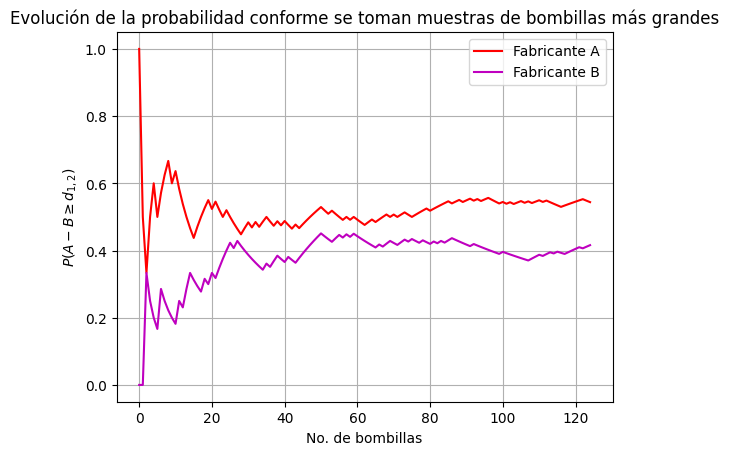

In [34]:
plt.plot(evol_prob_a, 'r')    # La gráficas muestran que la convergencia está comenzando a apreciarse con el tamaño de muestra "n"
plt.plot(evol_prob_b, 'm')    #propuesto en el planteamiento del problema.
plt.xlabel('No. de bombillas')    
plt.ylabel('$P(A - B\geq d_{1,2})$')
plt.grid(True)
plt.title('Evolución de la probabilidad conforme se toman muestras de bombillas más grandes')
plt.legend(['Fabricante A', 'Fabricante B'])
plt.show()

In [35]:
print('a: mu =', np.mean(evol_prob_a), ', sigma =', np.std(evol_prob_a))
print('b: mu =', np.mean(evol_prob_b), ', sigma =', np.std(evol_prob_b))

a: mu = 0.5223442309587754 , sigma = 0.058635497234492136
b: mu = 0.3773987175382953 , sigma = 0.0765984722055605


## **6. Repita el experimento $N$ veces.**

Primero, necesitamos determinar el número $N$ de veces necesarias que se debe simular el experimento para que la probabilidad estimada de que ocurra la observación deseada difiera de su valor verdadero en menos de $\epsilon$ con un nivel de confianza del $(1 − \alpha)\%$.

Este número $N$ está dado por

  \begin{align}
  N > \left( \frac{2 \sigma Z_{\alpha/2}}{\epsilon} \right)^2
  \end{align}

Implementamos el siguiente código:

In [36]:
epsilon = 0.01    # Establecer la cota superior epsilon para el error de la probabilidad estimada.
alpha = 0.05      # Indicar el grado de significancia que tendrá el valor establecido para epsilon.

In [37]:
N_a = int(np.ceil((2*np.std(evol_prob_a)*norm.ppf(1-alpha/2)/epsilon)**2))    # Cálculo del número de simulaciones del experimento
N_b = int(np.ceil((2*np.std(evol_prob_b)*norm.ppf(1-alpha/2)/epsilon)**2))    #necesarias para ambos casos a) y b).
print(N_a)
print(N_b)

529
902


In [38]:
def simulacion(N, d):                  # Función que devuelve una lista con las probabilidades estimadas promedio de los N
  prob = []                            #experimentos realizados para el caso indicado con "d".
  for i in range(N):
    evol_prob = experimento(n, d)
    prob.append(np.mean(evol_prob))
  return prob

In [39]:
prob_a = simulacion(N_a, a)    # Realizamos la simulación para cada caso.
prob_b = simulacion(N_b, b)

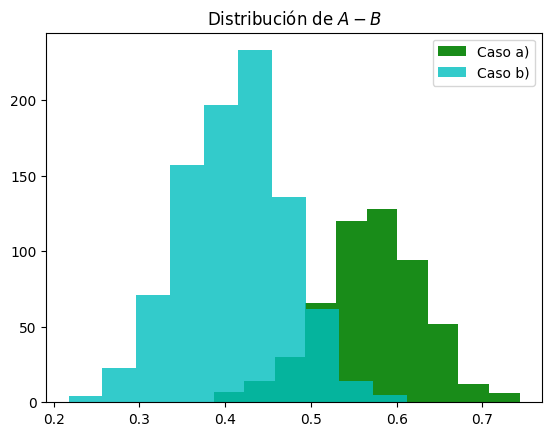

In [40]:
plt.hist(prob_a, color = 'g', alpha = 0.9)    # Las gráficas nos sugieren que la distribución de A - B aparentemente es normal
plt.hist(prob_b, color = 'c', alpha = 0.8)    #en ambos casos.
plt.grid(False)
plt.legend(['Caso a)' , 'Caso b)'])
plt.title('Distribución de $A - B$')
plt.show()
plt.show()

In [41]:
print('a: mu =', np.mean(prob_a), ', sigma =', np.std(prob_a))
print('b: mu =', np.mean(prob_b), ', sigma =', np.std(prob_b))

a: mu = 0.5713660953133838 , sigma = 0.05957617832399765
b: mu = 0.41215833760532583 , sigma = 0.06163382687495083


## **7. Hallamos el intervalo de confianza.**

Utilizamos la fórmula
  \begin{align}
  \bar{x} - Z_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}} < \mu < \bar{x} + Z_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}}
  \end{align}

Implementamos el siguiente código:

In [42]:
mu_a = np.mean(prob_a)                                           # Se presentan los intervalos de confianza para la media estimada en
li_a = mu_a - norm.ppf(1-alpha/2) * np.std(prob_a)/np.sqrt(n)    #cada caso de la forma: 
ls_a = mu_a + norm.ppf(1-alpha/2) * np.std(prob_a)/np.sqrt(n)    #
print('a:', li_a, '<', mu_a, '<', ls_a)                          #       Caso: Límite inferior < Media estimada < Límite superior

mu_b = np.mean(prob_b)
li_b = mu_b - norm.ppf(1-alpha/2) * np.std(prob_b)/np.sqrt(n)
ls_b = mu_b + norm.ppf(1-alpha/2) * np.std(prob_b)/np.sqrt(n)
print('b:', li_b, '<', mu_b, '<', ls_b)

a: 0.560922122676905 < 0.5713660953133838 < 0.5818100679498626
b: 0.401353649901748 < 0.41215833760532583 < 0.4229630253089037


## **8. Comparamos con la solución analítica.**

Se planteó que la diferencia $\,A - B\,$ modela adecuadamente el sistema y, gracias al teorema de la adición, se sigue que

  \begin{align}
  A - B \sim \mathrm{N}\left( 200, \sqrt{50000} \right)
  \end{align}

Por lo tanto, para calcular $\,P(A - B \geq d_{1,2})$, gracias a la continuidad de la función de distribución de $\,A - B\,$, sabemos que

  \begin{align}
  P(A - B \geq d_{1,2}) = P(A - B > d_{1,2}) = 1 - P(A - B \leq d_{1,2})
  \end{align}

Implementamos el siguiente código:

In [43]:
mu_a_ana = norm.sf(a, 200, np.sqrt(50000))    # Soluciones analíticas de ambos casos.
mu_b_ana = norm.sf(b, 200, np.sqrt(50000))

print('a:', mu_a_ana)
print('b:', mu_b_ana)

a: 0.5709861715062394
b: 0.41153163687906075


# **Solución**

In [44]:
print('Si se toman muestras al azar de ' + str(n) + ' bombillas de cada fabricante,\n\n')

print('CASO A: La probabilidad estimada mediante simulación de que las bombillas de A tengan una duración media que sea al menos ')
print(str(a) + ' horas mayor que la duración media de las bombillas de B es del ' + str(mu_a*100) + '%.\n')
print('La cual difiere en un ' + str(abs(mu_a - mu_a_ana)*100 / mu_a_ana) + '% de la solución analítica.\n\n\n')

print('CASO B: La probabilidad estimada mediante simulación de que las bombillas de A tengan una duración media que sea al menos ')
print(str(b) + ' horas mayor que la duración media de las bombillas de B es del ' + str(mu_b*100) + '%.\n')
print('La cual difiere en un ' + str(abs(mu_b - mu_b_ana)*100 / mu_b_ana) + '% de la solución analítica.')

Si se toman muestras al azar de 125 bombillas de cada fabricante,


CASO A: La probabilidad estimada mediante simulación de que las bombillas de A tengan una duración media que sea al menos 
160 horas mayor que la duración media de las bombillas de B es del 57.13660953133838%.

La cual difiere en un 0.06653818010025205% de la solución analítica.



CASO B: La probabilidad estimada mediante simulación de que las bombillas de A tengan una duración media que sea al menos 
250 horas mayor que la duración media de las bombillas de B es del 41.21583376053258%.

La cual difiere en un 0.1522849448508514% de la solución analítica.
